In [1]:
from regression_tree import *
from random_forest import RandomForest
from utils import *
from visualisation import *

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import pickle
import pandas as pd

In [2]:
data1 = pd.read_csv('../data_processed/mpg_data.csv')

pickle_file = open('../data_processed/mpg_dict.pkl', 'rb')
feature_structure1 = pickle.load(pickle_file)
pickle_file.close()

Time comparison of models 

In [12]:
# setup classifiers to test - comparison over time
tree_numbers = range(6, 25)
rfX_n_tree = [ RandomForest(n_trees=t) for t in tree_numbers]
skRF_n_tree = [ RandomForestRegressor(n_estimators=t) for t in tree_numbers]
skKNN_n_tree = [ KNeighborsRegressor(n_neighbors=t) for t in tree_numbers]

tree_methods = rfX_n_tree + skRF_n_tree
all_models_n_tree = rfX_n_tree + skRF_n_tree + skKNN_n_tree
tree_methods

[RandomForest(n_trees=6),
 RandomForest(n_trees=7),
 RandomForest(n_trees=8),
 RandomForest(n_trees=9),
 RandomForest(n_trees=10),
 RandomForest(n_trees=11),
 RandomForest(n_trees=12),
 RandomForest(n_trees=13),
 RandomForest(n_trees=14),
 RandomForest(n_trees=15),
 RandomForest(n_trees=16),
 RandomForest(n_trees=17),
 RandomForest(n_trees=18),
 RandomForest(n_trees=19),
 RandomForest(n_trees=20),
 RandomForest(n_trees=21),
 RandomForest(n_trees=22),
 RandomForest(n_trees=23),
 RandomForest(n_trees=24),
 RandomForestRegressor(n_estimators=6),
 RandomForestRegressor(n_estimators=7),
 RandomForestRegressor(n_estimators=8),
 RandomForestRegressor(n_estimators=9),
 RandomForestRegressor(n_estimators=10),
 RandomForestRegressor(n_estimators=11),
 RandomForestRegressor(n_estimators=12),
 RandomForestRegressor(n_estimators=13),
 RandomForestRegressor(n_estimators=14),
 RandomForestRegressor(n_estimators=15),
 RandomForestRegressor(n_estimators=16),
 RandomForestRegressor(n_estimators=17),
 Ra

In [15]:
all_models_n_tree

[RandomForest(n_trees=6),
 RandomForest(n_trees=7),
 RandomForest(n_trees=8),
 RandomForest(n_trees=9),
 RandomForest(n_trees=10),
 RandomForest(n_trees=11),
 RandomForest(n_trees=12),
 RandomForest(n_trees=13),
 RandomForest(n_trees=14),
 RandomForest(n_trees=15),
 RandomForest(n_trees=16),
 RandomForest(n_trees=17),
 RandomForest(n_trees=18),
 RandomForest(n_trees=19),
 RandomForest(n_trees=20),
 RandomForest(n_trees=21),
 RandomForest(n_trees=22),
 RandomForest(n_trees=23),
 RandomForest(n_trees=24),
 RandomForestRegressor(n_estimators=6),
 RandomForestRegressor(n_estimators=7),
 RandomForestRegressor(n_estimators=8),
 RandomForestRegressor(n_estimators=9),
 RandomForestRegressor(n_estimators=10),
 RandomForestRegressor(n_estimators=11),
 RandomForestRegressor(n_estimators=12),
 RandomForestRegressor(n_estimators=13),
 RandomForestRegressor(n_estimators=14),
 RandomForestRegressor(n_estimators=15),
 RandomForestRegressor(n_estimators=16),
 RandomForestRegressor(n_estimators=17),
 Ra

In [11]:
res_rfX_n_tree = evaluate_models(data1, feature_structure1, rfX_n_tree)
res_rfX_n_tree

[<regression_tree.TreeNode object at 0x0000022654C28950>, <regression_tree.TreeNode object at 0x0000022654F97DA0>, <regression_tree.TreeNode object at 0x0000022652971F40>, <regression_tree.TreeNode object at 0x0000022654C1A150>, <regression_tree.TreeNode object at 0x0000022654F76390>, <regression_tree.TreeNode object at 0x00000226528B8CE0>]
[<regression_tree.TreeNode object at 0x00000226528B8770>, <regression_tree.TreeNode object at 0x000002265296C980>, <regression_tree.TreeNode object at 0x0000022654D06C60>, <regression_tree.TreeNode object at 0x0000022654D048C0>, <regression_tree.TreeNode object at 0x000002265276B470>, <regression_tree.TreeNode object at 0x00000226527699D0>]
[<regression_tree.TreeNode object at 0x00000226528BAD20>, <regression_tree.TreeNode object at 0x0000022654BB1CA0>, <regression_tree.TreeNode object at 0x0000022654BB0860>, <regression_tree.TreeNode object at 0x0000022654B0F710>, <regression_tree.TreeNode object at 0x0000022654B0C860>, <regression_tree.TreeNode ob

,model,mse,timing
0,RandomForest(n_trees=6)_CV,11.258517,2.674979
1,RandomForest(n_trees=7)_CV,10.486666,2.958664
2,RandomForest(n_trees=8)_CV,10.525437,3.468644
3,RandomForest(n_trees=9)_CV,10.562742,3.826266
4,RandomForest(n_trees=10)_CV,10.420556,4.237300
5,RandomForest(n_trees=11)_CV,9.687076,5.730679
6,RandomForest(n_trees=12)_CV,9.936768,5.068996
7,RandomForest(n_trees=13)_CV,9.382361,5.738214
8,RandomForest(n_trees=14)_CV,10.632508,6.133190
9,RandomForest(n_trees=15)_CV,9.594725,6.449802


[<regression_tree.TreeNode object at 0x00000226525BCD10>, <regression_tree.TreeNode object at 0x00000226529E3650>, <regression_tree.TreeNode object at 0x00000226528BBB00>, <regression_tree.TreeNode object at 0x0000022652940B60>, <regression_tree.TreeNode object at 0x0000022652942420>, <regression_tree.TreeNode object at 0x00000226529E7C20>]
[<regression_tree.TreeNode object at 0x00000226529F5DC0>, <regression_tree.TreeNode object at 0x0000022654F970B0>, <regression_tree.TreeNode object at 0x0000022654FBEA80>, <regression_tree.TreeNode object at 0x0000022654FBF410>, <regression_tree.TreeNode object at 0x00000226529D8230>, <regression_tree.TreeNode object at 0x0000022652952660>]
[<regression_tree.TreeNode object at 0x0000022654F96870>, <regression_tree.TreeNode object at 0x00000226529C5F10>, <regression_tree.TreeNode object at 0x0000022654FAE4E0>, <regression_tree.TreeNode object at 0x0000022654FAF680>, <regression_tree.TreeNode object at 0x000002265297E270>, <regression_tree.TreeNode ob

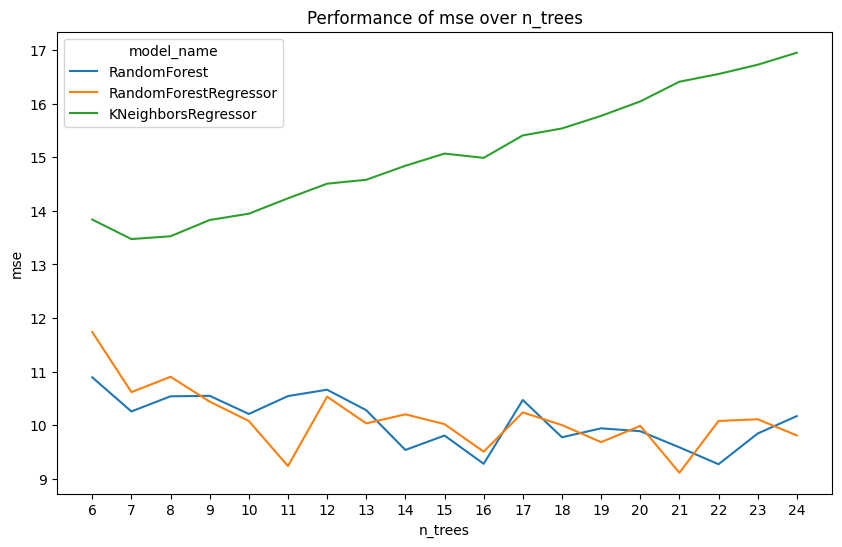

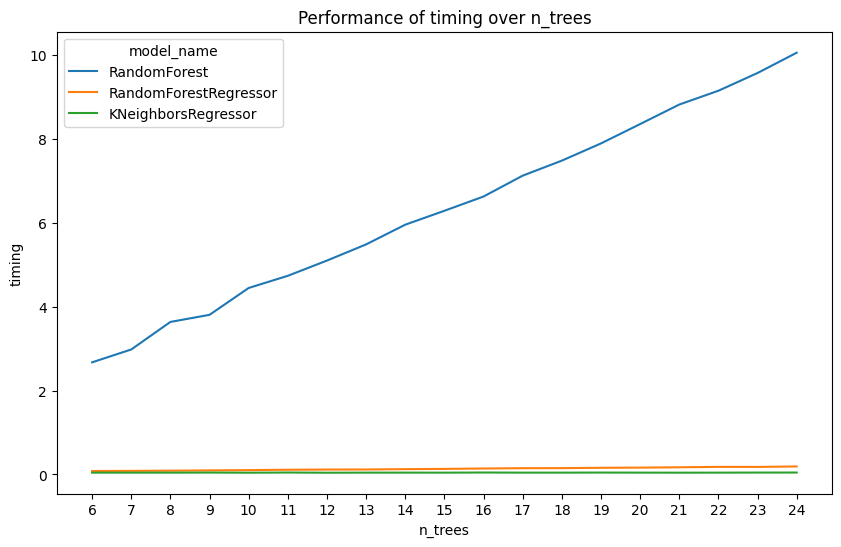

In [9]:
res_all_models = evaluate_models(data1, feature_structure1, all_models_n_tree)
visualise_results(res_all_models, save=True)

[<regression_tree.TreeNode object at 0x000002265296DEE0>, <regression_tree.TreeNode object at 0x0000022654B26330>, <regression_tree.TreeNode object at 0x0000022654F77E90>, <regression_tree.TreeNode object at 0x0000022654F75C70>, <regression_tree.TreeNode object at 0x0000022654C85970>, <regression_tree.TreeNode object at 0x000002265276B080>]
[<regression_tree.TreeNode object at 0x0000022651D57500>, <regression_tree.TreeNode object at 0x0000022654C3D700>, <regression_tree.TreeNode object at 0x0000022654D22480>, <regression_tree.TreeNode object at 0x0000022654D211C0>, <regression_tree.TreeNode object at 0x0000022654FBDBE0>, <regression_tree.TreeNode object at 0x0000022654FBFF50>]
[<regression_tree.TreeNode object at 0x000002265296DD90>, <regression_tree.TreeNode object at 0x0000022654CCD130>, <regression_tree.TreeNode object at 0x0000022654CCF620>, <regression_tree.TreeNode object at 0x00000226529515E0>, <regression_tree.TreeNode object at 0x00000226529504D0>, <regression_tree.TreeNode ob

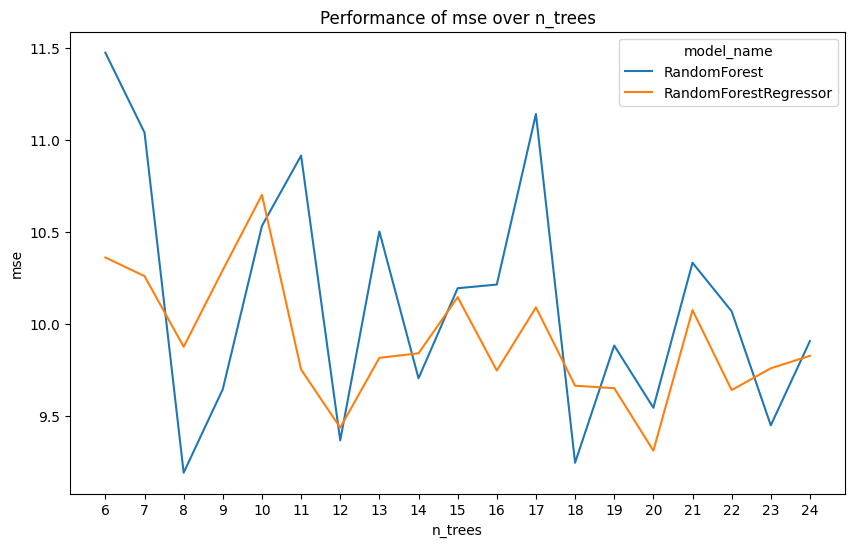

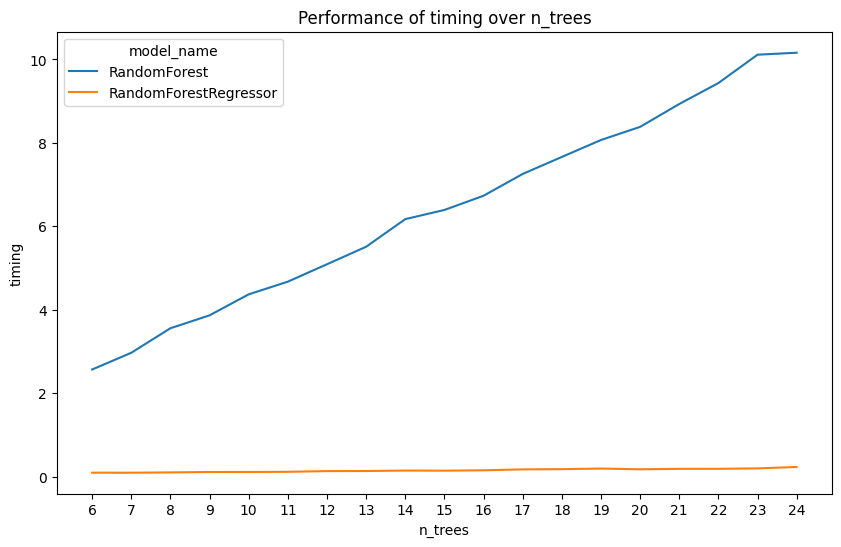

In [13]:
res_tree_methods = evaluate_models(data1, feature_structure1, tree_methods)
visualise_results(res_tree_methods, save=True)